In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
d = os.getcwd()
#fname =  os.path.join(d,'USA_Housing.csv')

In [3]:

import csv
 
# opening the CSV file
with open(os.path.join(d,'USA_Housing.csv'), mode ='r')as file: 
    df = pd.read_csv(file)


In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Check null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

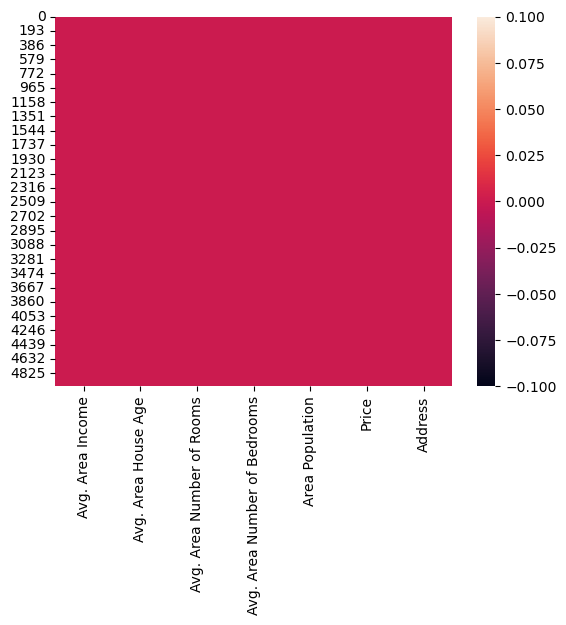

In [7]:
# Visualize null values with heatmap
sns.heatmap(df.isnull())
plt.show()

In [8]:
# How many records
df.shape

(5000, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Data Preparation

1. There are no null values, so there is no need of deleting or replacing the data.
2. There is no necessity of having Address column so I am dropping it.

In [11]:
# Dropping Address Column
df.drop('Address',axis = 1, inplace = True)

In [12]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


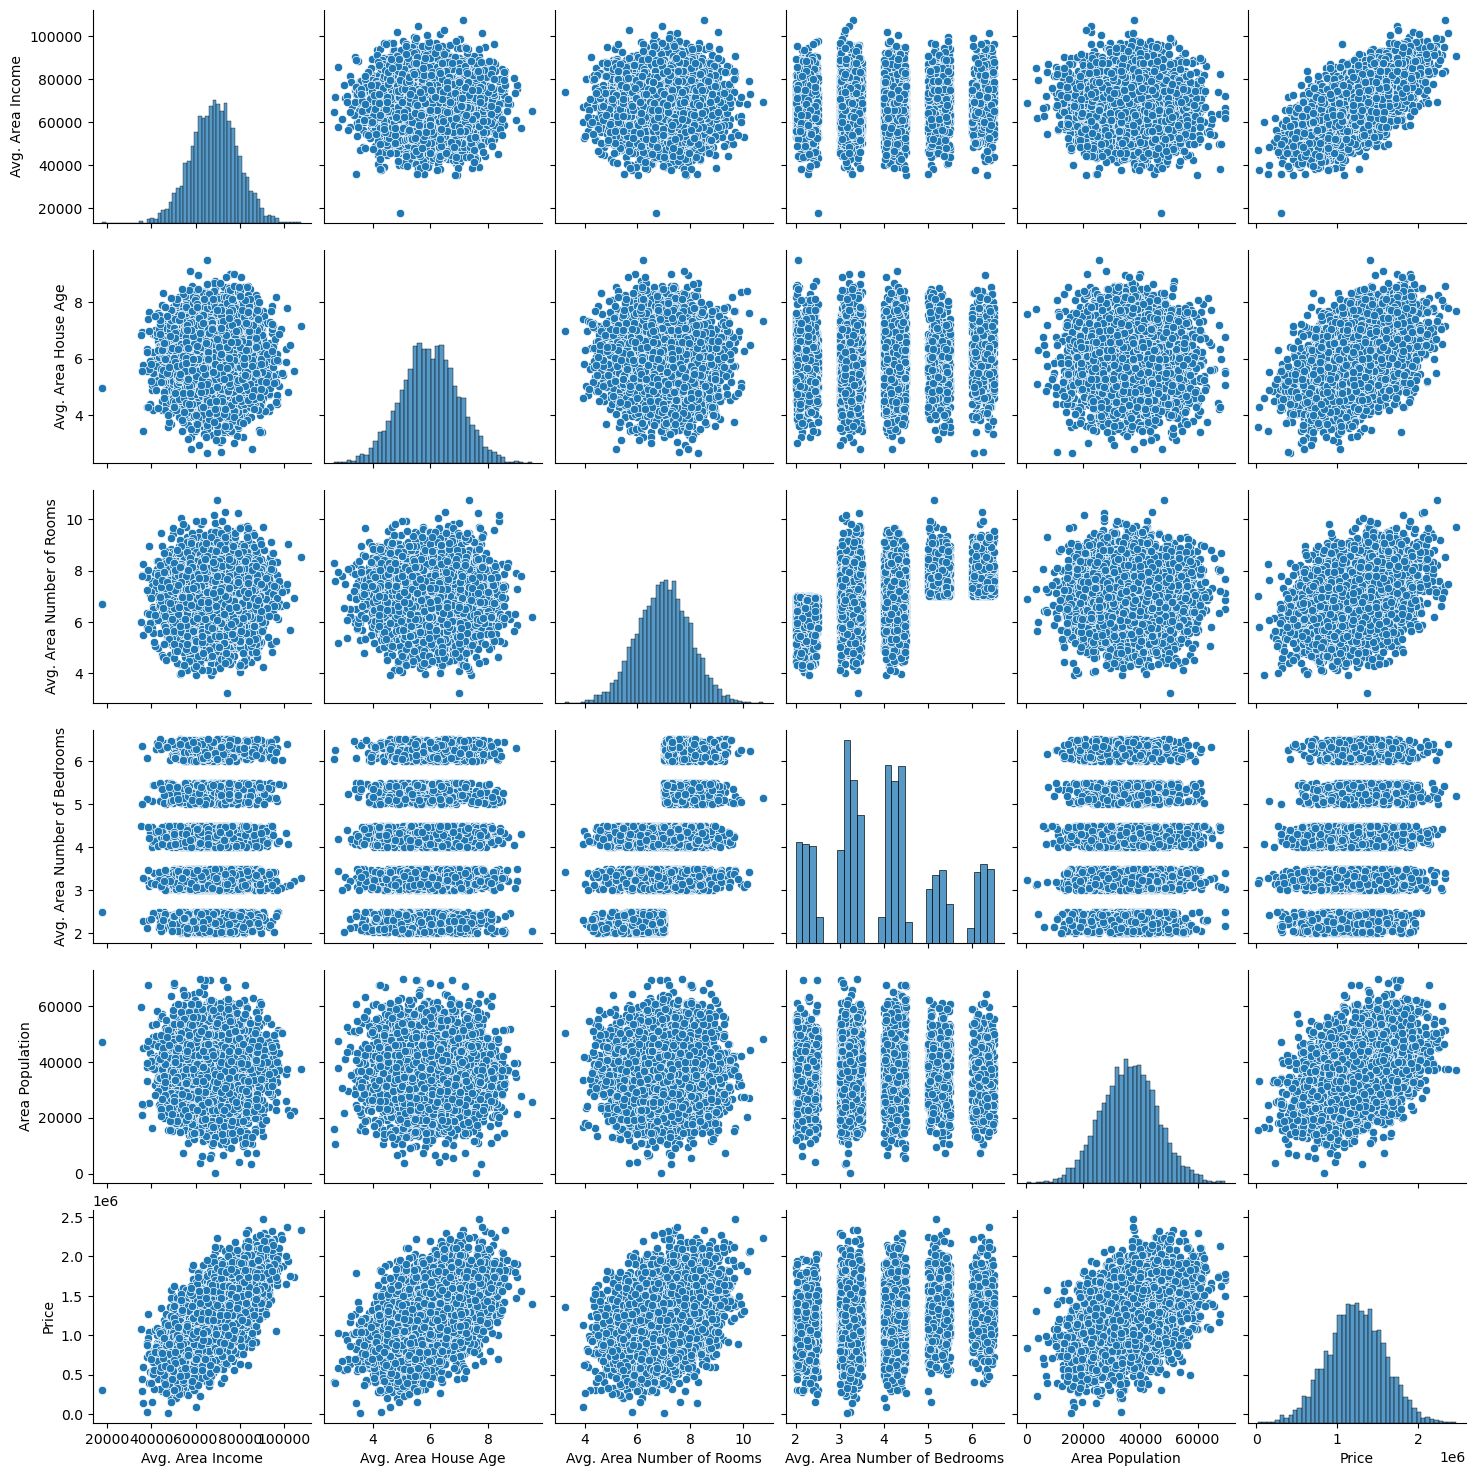

In [13]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df)
plt.show()

## Splitting the data into Input and Output

In [14]:
X = df.drop('Price',axis = 1)    # Input
Y = df['Price']

In [15]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [16]:
df.shape

(5000, 6)

In [17]:
X_train.shape

(3500, 5)

In [18]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1334,59481.782006,4.776719,7.545438,4.31,31200.967833
4768,71663.056200,4.911607,7.211583,5.00,39241.820366
65,56547.507187,5.435415,6.515150,3.13,37585.274576
177,59513.834920,4.885132,5.574714,3.18,44162.279205
4489,63753.864240,8.112336,7.694745,6.35,31347.689784


In [19]:
X_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2764,75012.341660,6.742828,6.604335,4.10,42877.424147
4767,76187.273309,6.156222,7.166149,3.32,45084.394236
3814,67622.219611,5.813928,5.071112,4.16,35359.848465
3499,66933.165273,4.748787,5.879803,2.09,41834.042941
2735,65192.105635,6.275509,8.017889,4.47,26228.394577


In [20]:
# Applying Standard Scaler
from sklearn.preprocessing import StandardScaler
# Create object of Standard Scaler class.
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [21]:
X_train

array([[-0.85963105, -1.21289422,  0.57045764,  0.27357401, -0.49946783],
       [ 0.29135867, -1.07749605,  0.23697072,  0.83509129,  0.31239556],
       [-1.13688613, -0.55170596, -0.45869274, -0.68670192,  0.14513856],
       ...,
       [ 1.08019808,  0.46538832, -0.48454619, -1.20752955, -0.9663989 ],
       [ 0.40820328, -0.76588835, -0.11321457,  0.19219469,  0.31939534],
       [-0.14387552, -0.76575953,  0.18895864,  1.03853958, -1.11196456]])

In [22]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')


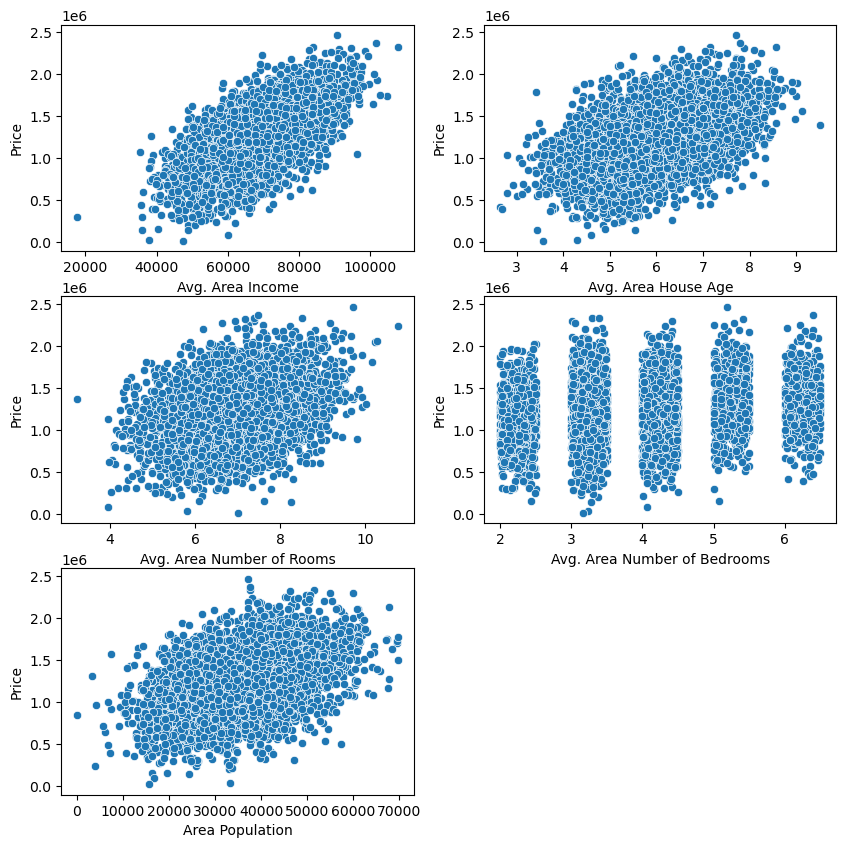

In [23]:
# Check relation between inputs and outpt
# We see which input features are more important to predict the output sales 
column=X.columns
print(column)
plt.figure(figsize=(10,10))
for i, col in enumerate(column):
    plt.subplot(3,2,i+1)
    sns.scatterplot(data=df,x=col,y='Price')
plt.show()

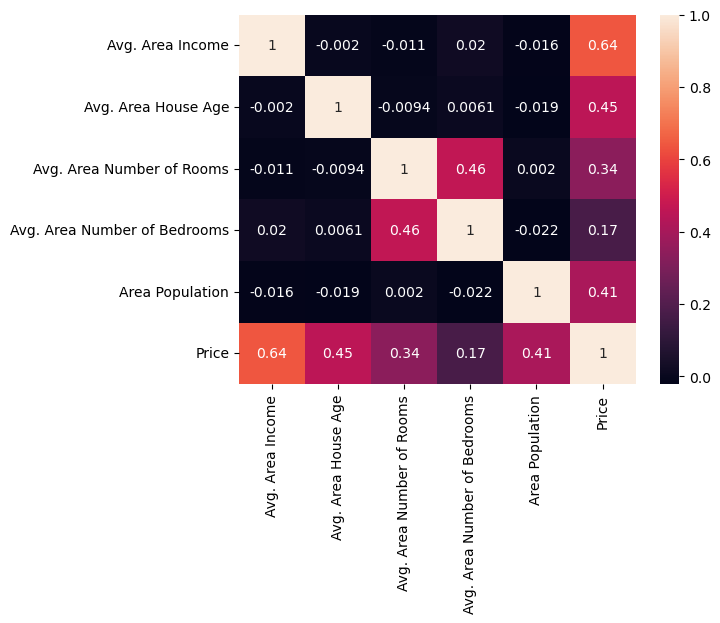

In [24]:
# check correlation values
sns.heatmap(df.corr(),annot=True)
plt.show()

In [25]:
df.corr().Price.sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

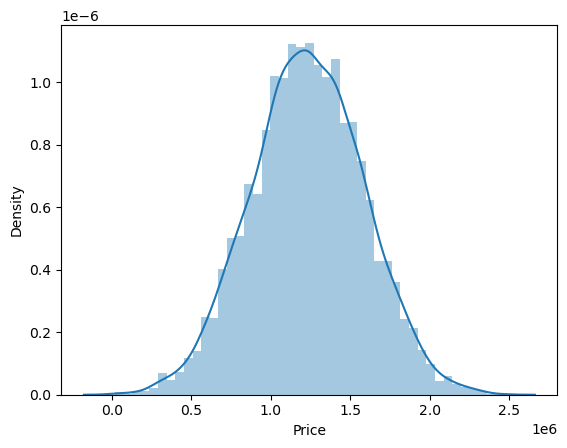

In [26]:
sns.distplot(df.Price)
plt.show()

In [27]:
from scipy.stats import skew

Avg. Area Income
-0.03370985856853668


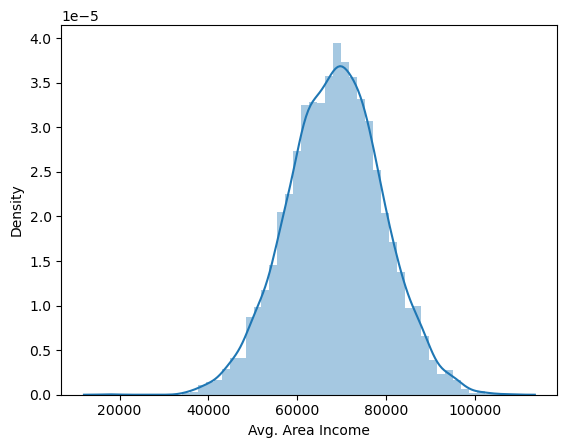

Avg. Area House Age
-0.007211708023735578


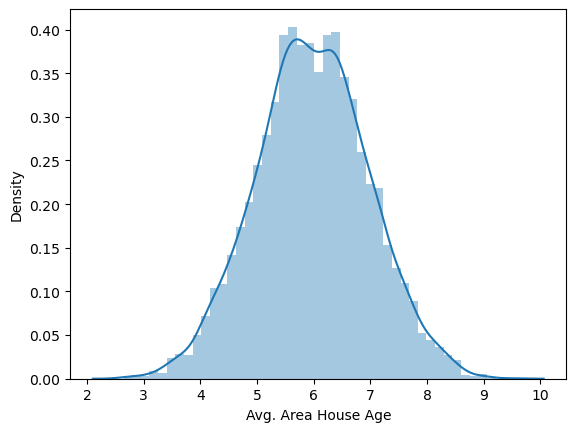

Avg. Area Number of Rooms
-0.040983610381965664


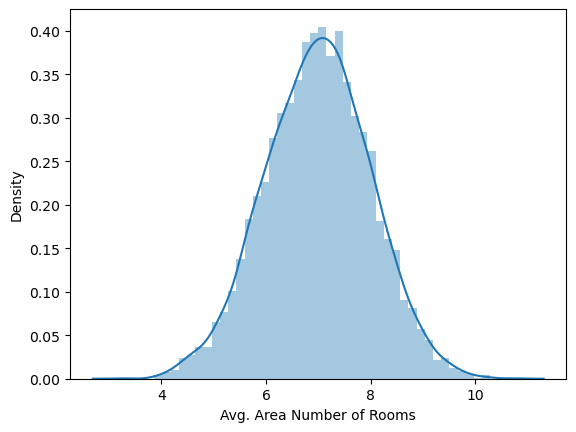

Avg. Area Number of Bedrooms
0.37612751568905145


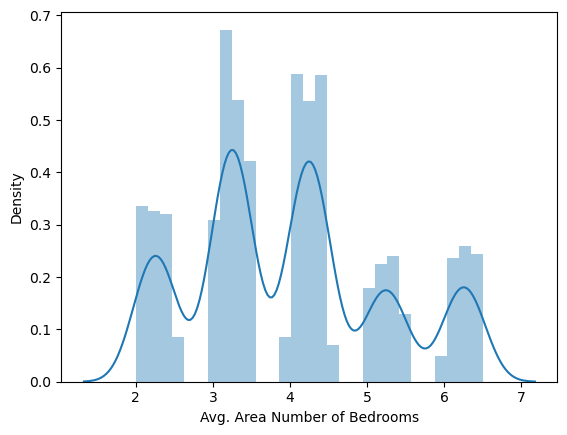

Area Population
0.05063448536127159


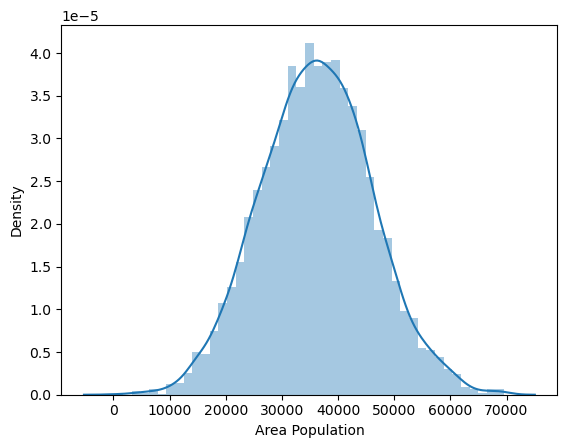

In [28]:
# To check the skewness of all i/p columns
for col in X:
    print(col)
    print(skew(X[col]))
    
    sns.distplot(X[col])
    plt.show()

## Create Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Create an object of linearRegression class
lr = LinearRegression()

In [31]:
# Train model with 70% data
lr.fit(X_train,Y_train)

LinearRegression()

In [32]:
# Check slope/coefficient
m = lr.coef_
print('slope/coefficient is :-',m)

slope/coefficient is :- [229021.16518877 165104.47042836 121092.12246515   2395.07116381
 150803.47554561]


In [33]:
# Let's see the coefficient as dataframe
coeff_df = pd.DataFrame(m,columns = ['Coefficients'])
coeff_df

# From the above result we may infer that coefficient of Columns like'Avg. Area House Age','Avg. Area Number of Rooms'
# and 'Avg. Area Number of Bedrooms' are influencing more as compared to other, hence we need to do scaling.

,Coefficients
0,229021.165189
1,165104.470428
2,121092.122465
3,2395.071164
4,150803.475546


In [34]:
# Check intercept
c = lr.intercept_
print('Intercept :- ',c)

Intercept :-  1232402.8065984936


In [35]:
# Making Prediction
Y_pred = lr.predict(X_test)

In [36]:
print(Y_pred)

[1555151.93144956 1583399.08583416  941481.35482435 ... 1099846.27252112
  974837.76044581 1731306.80613917]


In [37]:
# create dictionary
dict={'Actual Output':Y_test,'Predicted Output':Y_pred}
# convert dictionary into dataframe
df1=pd.DataFrame(dict)
df1

,Actual Output,Predicted Output
2764,1.413580e+06,1.555152e+06
4767,1.618721e+06,1.583399e+06
3814,8.413925e+05,9.414814e+05
3499,8.814439e+05,9.424062e+05
2735,1.174748e+06,1.183395e+06
...,...,...
4140,9.391390e+05,1.036992e+06
3969,7.181870e+05,8.561627e+05
2535,1.109640e+06,1.099846e+06
1361,1.102641e+06,9.748378e+05


In [38]:
# import statsmodels.api as sm
# X_train_sm = X_train
# #Unlike SKLearn, statsmodels don't automatically fit a constant, 
# #so you need to use the method sm.add_constant(X) in order to add a constant. 
# X_train_sm = sm.add_constant(X_train_sm)
# # create a fitted model in one line
# lm_1 = sm.OLS(Y_train,X_train_sm).fit()

# # print the coefficients
# lm_1.params

In [39]:
# Mean Squared Error 1/N*sum(Y-Y-pred)**2
from sklearn.metrics import mean_squared_error
print('MSE : ',mean_squared_error(Y_test,Y_pred))

MSE :  10567448570.930687


In [40]:
# Root Mean_Squared_Error
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print('Root mean squared error = ', rmse)

Root mean squared error =  102798.09614448455


In [41]:
# To check the model is perfect or not check r2 score
from sklearn.metrics import r2_score
print('R2_score =',r2_score(Y_test,Y_pred))

R2_score = 0.9166912271539766


## Assumptions of Linear Regression : -

In [42]:
# Assumptions of Linear Regression : -
# 1.There should not be Multicolinearity in linear regression  
#   Solve this assumption .means we removed the Multicolinearity situation
#   first Assumption : Should not be Multicolinearity 
#   what is multicolinearity ?

# If Colinearity arises then delete unnecessary columns and train_test_split the model again.

# We have already checked the colinearity and none of the input columns are colinear with each other

In [43]:
#Assumption of Linear Regression 
#2. there should be a linear relationship between input and output
#Use Trick ,to check linear relation between multiple input and output
#Check Linear relation between inputs columns and  output: sales
#tricks , find residual of each datapoints
residual=Y_test-Y_pred
print(residual)

2764   -141572.114699
4767     35322.052596
3814   -100088.861796
3499    -60962.298232
2735     -8647.916184
            ...      
4140    -97853.163629
3969   -137975.678881
2535      9793.723147
1361    127803.353577
1458   -140072.032732
Name: Price, Length: 1500, dtype: float64


In [44]:
# create a dictionary.
dic={'Y_pred':Y_pred,'Residual':residual}
df1=pd.DataFrame(dic)
df1

,Y_pred,Residual
2764,1.555152e+06,-141572.114699
4767,1.583399e+06,35322.052596
3814,9.414814e+05,-100088.861796
3499,9.424062e+05,-60962.298232
2735,1.183395e+06,-8647.916184
...,...,...
4140,1.036992e+06,-97853.163629
3969,8.561627e+05,-137975.678881
2535,1.099846e+06,9793.723147
1361,9.748378e+05,127803.353577


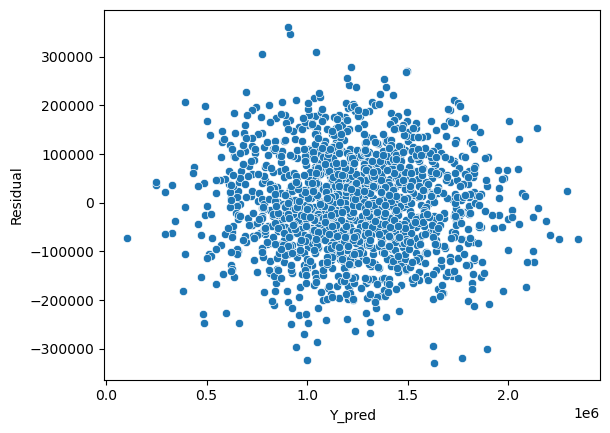

In [45]:
# Visualise scatterplot between Y_pred and residual means
# here input x=Y_pred and y=residual because residuals depends on y_pred value
sns.scatterplot(data=df1,x='Y_pred',y='Residual')
plt.show()

In [46]:
# in above scatterplot, This is a linear relation between Y_pred
# and residual means there is relation between x=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
#                                         'Avg. Area Number of Bedrooms', 'Area Population']  with sales o/p
# Hence second assumption is fullfilled.

In [47]:
#3. Assumption :  if there is a linear relation then next check whether relation is
#homoskedatik means should not be heteroskedastik.
#Homoskedastik means datapoints close each other
#heteroskedastik means no datapoints close each other i.e scattered


#4. Assumption of linear regression : - Residual should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
#use distplot() and histplot()

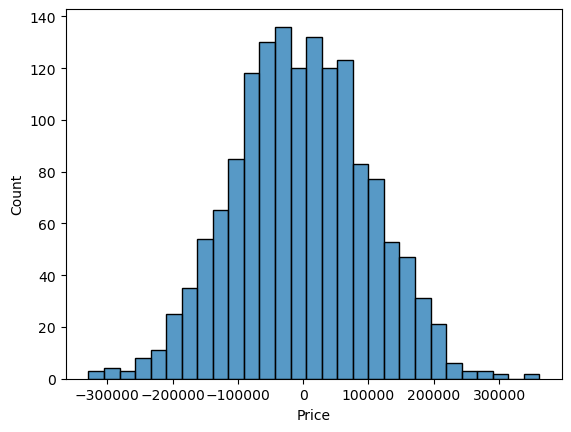

In [48]:
# create histogram (frequence graph)
sns.histplot(residual)
plt.show()

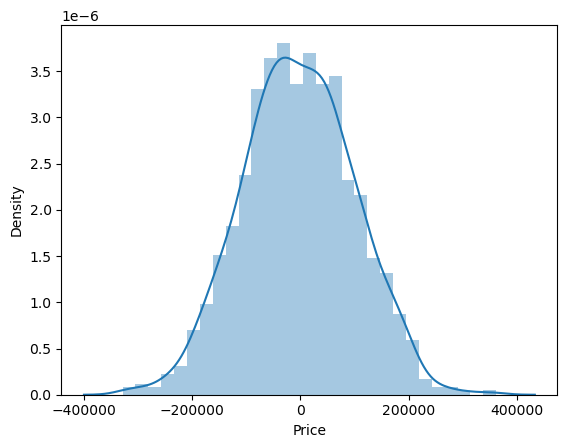

In [49]:
# create distplot()
sns.distplot(residual)
plt.show()

In [50]:
# From above diagram we see that bordering line forms a bell shaped curve.This means that data is normally distributed.
# this is Symmetric curve i.e 4th Assumption of Normally distributed curve is fullfilled.

In [51]:
# Find skewness
residual.skew()

0.013396256628565858

In [52]:
dict = {'Actual Output':Y_test,'Predicted Output':Y_pred}
# Converting Dictionary into DataFrame
df2 = pd.DataFrame(dict)
df2.head()

,Actual Output,Predicted Output
2764,1.413580e+06,1.555152e+06
4767,1.618721e+06,1.583399e+06
3814,8.413925e+05,9.414814e+05
3499,8.814439e+05,9.424062e+05
2735,1.174748e+06,1.183395e+06


In [53]:
# Find pridicted price of 3300 sqrt feet Area : use inbuilt method predict()
# of Linear Regression class
Y_pred=lr.predict([[75012.34166,6.742828,6.742828,4.1,42877.424147]])   # Y_pred=lr.predict([[pass input in 2D array]])
print("Price of House  = ",Y_pred)

Price of House  =  [2.36486505e+10]


In [54]:
Y_pred=lr.predict([[7600,7,6.3,5,8]])   # Y_pred=lr.predict([[pass input in 2D array]])
print("Price of House  = ",Y_pred)

Price of House  =  [1.74493027e+09]


In [55]:
# In our Case all the 4 LinearRegression conditions are satisfied

In [56]:
# # Avg. Area Income, Avg. Area House Age , Avg. Area Number of Rooms,
# #Avg. Area Number of Bedrooms, Area Population

# area_income = float(input('Avg. Area Income'))
# print(area_income)
# Avg_Area_House_Age = float(input('Avg. Area House Age'))
# print(Avg_Area_House_Age)
# Avg_Area_Number_of_Rooms = float(input('Avg. Area Number of Rooms'))
# print(Avg_Area_Number_of_Rooms)
# Avg_Area_Number_of_Bedrooms = float(input('Avg. Area Number of Bedrooms'))

# Area_Population = float(input('Area Population'))


# Y_pred=lr.predict([[area_income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population]])   # Y_pred=lr.predict([[pass input in 2D array]])
# print("Price of House  = ",Y_pred)

## We will use Streamlit library for ML Algorithm deployment

In [57]:
# Deploy ML model

In [58]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [59]:
import pickle

In [60]:
file1 = open("Linear_Regression.pkl",'wb')   # Open file in write binary format
file2 = open("Standard_Scaler.pkl",'wb')

# here file1 and file2 are temporary file

In [61]:
pickle.dump(lr,file1)  # here dt is an object of LinearRegression() class
# It is used to save object of LinearRegression() in file1

pickle.dump(ss,file2)
# It is used to save object of StandardScaler() in file

In [62]:
file1.close()
file2.close()

In [63]:
# TEST

In [64]:
# # X_test = ss.transform(X_test)
# inversed = ss.inverse_transform(X_test)
# print(inversed)